## Import

In [1]:
import sys
sys.path.append(r'C:\Users\Marco\Documents\GitHub\GeoSpatial-analysis\facility-location-Bergen\src\facility_location_Bergen\custome_modules')

In [2]:
import io
import pytz
import numpy as np
import pandas as pd
from time import time
from PIL import Image
import geopandas as gpd
import cartopy.crs as ccrs
from datetime import datetime
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
from urllib.request import urlopen, Request
from matplotlib.animation import FuncAnimation
from mongo_db import retrieve_database_and_collections
from convert_geometry import toMultiLineString, toExtremePoints

## Retrieve collection and convert to a dataframe

In [6]:
day = "21_04_2023"
db_name = "facility_location_Bergen"

In [7]:
def from_json_to_gdf(db_name:str, day: str):
    # set the first and last date of the day
    first_date = datetime.strptime(f"{day}T07:30:00.000+02:00", "%d_%m_%YT%H:%M:%S.%f%z")
    last_date = datetime.strptime(f"{day}T17:00:00.000+02:00", "%d_%m_%YT%H:%M:%S.%f%z")
    # retrieve database and collections
    db, collection = retrieve_database_and_collections(db_name, day, ["clean"])
    key_list = list(collection.keys())
    clean_collection = collection[key_list[0]]
    # retrieve data from mongoDB and convert it to a pandas dataframe
    df = pd.json_normalize(clean_collection.find({"api_call_time": {"$gte": first_date, "$lte": last_date}}))
    df.set_index("_id", inplace=True)
    # process dataframe columns
    df['geometry.multi_line'] = df.apply(lambda x: toMultiLineString(x["geometry.geometries"]), axis=1)
    df['geometry.extreme_point'] = df.apply(lambda x: toExtremePoints(x["geometry.multi_line"]), axis=1)
    df['api_call_time'] = df.apply(lambda x: x["api_call_time"].tz_localize('UTC'), axis=1)
    df['sourceUpdated'] = df.apply(lambda x: x["sourceUpdated"].tz_localize('UTC'), axis=1)
    # convert dataframe to geodataframe
    gdf = gpd.GeoDataFrame(df, geometry="geometry.multi_line")
    return gdf

In [8]:
gdf = from_json_to_gdf(db_name, day)

c:\Users\Marco\Documents\GitHub\GeoSpatial-analysis\kedro-env\lib\site-packages\pandas\core\dtypes\inference.py:391: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
c:\Users\Marco\Documents\GitHub\GeoSpatial-analysis\kedro-env\lib\site-packages\pandas\core\dtypes\inference.py:392: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
c:\Users\Marco\Documents\GitHub\GeoSpatial-analysis\kedro-env\lib\site-packages\pandas\core\dtypes\cast.py:1542: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead

In [ ]:
gdf.head()

c:\Users\Marco\Documents\GitHub\GeoSpatial-analysis\kedro-env\lib\site-packages\pandas\core\dtypes\inference.py:391: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
c:\Users\Marco\Documents\GitHub\GeoSpatial-analysis\kedro-env\lib\site-packages\pandas\core\dtypes\inference.py:392: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
c:\Users\Marco\Documents\GitHub\GeoSpatial-analysis\kedro-env\lib\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the cons

,sourceUpdated,api_call_time,description,length,currentFlow.speed,currentFlow.speedUncapped,currentFlow.freeFlow,currentFlow.jamFactor,currentFlow.confidence,currentFlow.traversability,geometry.type,geometry.geometries,currentFlow.jamTendency,currentFlow.junctionTraversability,geometry.multi_line,geometry.extreme_point
_id,,,,,,,,,,,,,,,,
64492f00a2e45ae9289e7c89,2023-04-20 12:58:09+00:00,2023-04-20 13:00:00+00:00,Herland,374.0,13.611112,13.611112,16.11111,1.4,0.74,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.537...",NaN,NaN,"MULTILINESTRING ((5.53747 60.42335, 5.53757 60...","(POINT (5.53747 60.42335), POINT (5.53903 60.4..."
64492f00a2e45ae9289e8098,2023-04-20 13:03:09+00:00,2023-04-20 13:05:00+00:00,Herland,374.0,13.055556,13.055556,16.11111,1.7,0.72,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.537...",NaN,NaN,"MULTILINESTRING ((5.53747 60.42335, 5.53757 60...","(POINT (5.53747 60.42335), POINT (5.53903 60.4..."
64492f00a2e45ae9289e827c,2023-04-20 13:08:09+00:00,2023-04-20 13:10:00+00:00,Herland,374.0,13.055556,13.055556,16.11111,1.6,0.72,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.537...",NaN,NaN,"MULTILINESTRING ((5.53747 60.42335, 5.53757 60...","(POINT (5.53747 60.42335), POINT (5.53903 60.4..."
64492f00a2e45ae9289e879e,2023-04-20 13:13:09+00:00,2023-04-20 13:15:00+00:00,Herland,374.0,13.055556,13.055556,16.11111,1.6,0.71,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.537...",NaN,NaN,"MULTILINESTRING ((5.53747 60.42335, 5.53757 60...","(POINT (5.53747 60.42335), POINT (5.53903 60.4..."
64492f00a2e45ae9289e88e8,2023-04-20 13:18:09+00:00,2023-04-20 13:20:00+00:00,Herland,374.0,13.055556,13.055556,16.11111,1.6,0.71,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.537...",NaN,NaN,"MULTILINESTRING ((5.53747 60.42335, 5.53757 60...","(POINT (5.53747 60.42335), POINT (5.53903 60.4..."


In [9]:
gdf.describe()

,length,currentFlow.speed,currentFlow.speedUncapped,currentFlow.freeFlow,currentFlow.jamFactor,currentFlow.confidence,currentFlow.jamTendency
count,38430.000000,38250.000000,38250.000000,38430.000000,38430.000000,38250.000000,15.000000
mean,1095.093443,10.930218,10.984336,12.357013,1.129979,0.874521,-0.466667
std,1349.393435,4.793643,4.900325,4.331328,1.495545,0.100275,0.915475
min,5.000000,1.111111,1.111111,2.777778,0.000000,0.700000,-1.000000
25%,92.000000,7.500000,7.500000,8.888889,0.100000,0.790000,-1.000000
50%,629.000000,10.000000,10.000000,11.388889,0.700000,0.900000,-1.000000
75%,1559.000000,13.611112,13.888889,15.000000,1.600000,0.970000,0.000000
max,8127.000000,22.777779,34.166668,22.222223,10.000000,0.990000,1.000000


In [10]:
first_morning_date = datetime.strptime(f"{day}T07:30:00.000+02:00", "%d_%m_%YT%H:%M:%S.%f%z")

<AxesSubplot:>

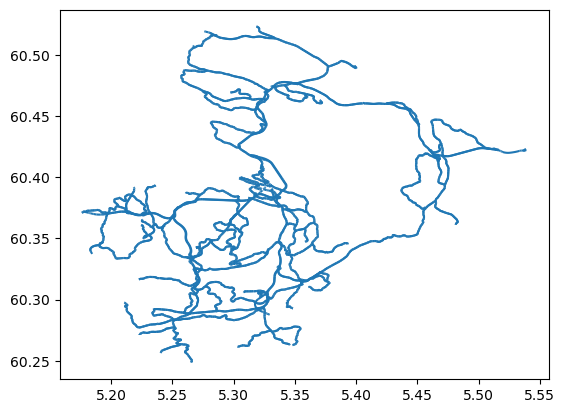

In [11]:
gdf.where(gdf["api_call_time"]==first_morning_date).dropna(how="all").plot()

### Work with morning data

#### Animated

In [12]:
first_date = first_morning_date
last_date = datetime.strptime(f"2023-04-{day[:2]}T09:30:00.000+02:00", "%Y-%m-%dT%H:%M:%S.%f%z")

In [13]:
gdf_sample = gdf.where((gdf["api_call_time"]>=first_date) & (gdf["api_call_time"]<=last_date)).dropna(how="all")

In [14]:
def get_color(jam):
    if jam is np.nan:
        return np.nan
    
    if 0 <= jam <= 3:
        return "green"
    elif 3 < jam <= 7:
        return "orange"
    elif 7 <= jam <= 10:
        return "red"

In [15]:
lats = {}
lons = {}
df_dict = {}
t = time()

for i, date in enumerate(gdf_sample["api_call_time"].unique()):
    df = gdf_sample.where(gdf_sample["api_call_time"]==date).dropna(how="all")
    df_dict[date]=[]
    
    for feature, date, jam in zip(df['geometry.multi_line'], df["api_call_time"], df["currentFlow.jamFactor"]):
        color = get_color(jam)
        linestrings = feature.geoms
        lats = []
        lons = []
        dates = []
        colors = []
        
        for linestring in linestrings:
            x, y = linestring.xy
            lats = np.append(lats, list(x))
            lons = np.append(lons, list(y))
            dates = np.append(dates, [date]*len(x))
            colors = np.append(colors, [color]*len(x))
        
        df_dict[date].append(pd.DataFrame({"lat": lats, "lon": lons, "date": dates, "color": colors}))
        df_dict[date][-1] = pd.concat([df_dict[date][-1], 
                                       pd.DataFrame({"lat": [np.nan], "lon": [np.nan], "date": [np.nan], "color": [np.nan]})],
                                      ignore_index=True)
        
    if i%2==0:
        print(f"Time after {i} iter: {time()-t}")

Time after 0 iter: 3.1300034523010254
Time after 2 iter: 9.211001873016357
Time after 4 iter: 14.87299656867981
Time after 6 iter: 20.01799488067627
Time after 8 iter: 25.412999391555786
Time after 10 iter: 32.36899709701538
Time after 12 iter: 37.96799659729004
Time after 14 iter: 42.823999881744385
Time after 16 iter: 50.857999086380005
Time after 18 iter: 56.63100457191467
Time after 20 iter: 64.10200023651123
Time after 22 iter: 69.2670533657074
Time after 24 iter: 74.67299771308899


In [16]:
df_dict2 = {}

for key in df_dict.keys():
    df_dict2[key] = pd.concat(df_dict[key], ignore_index=True)

In [20]:
def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

In [21]:
cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.OSM() # spoofed, downloaded street map

Text(0.5, 1.0, 'Traffic across time in Bergen')

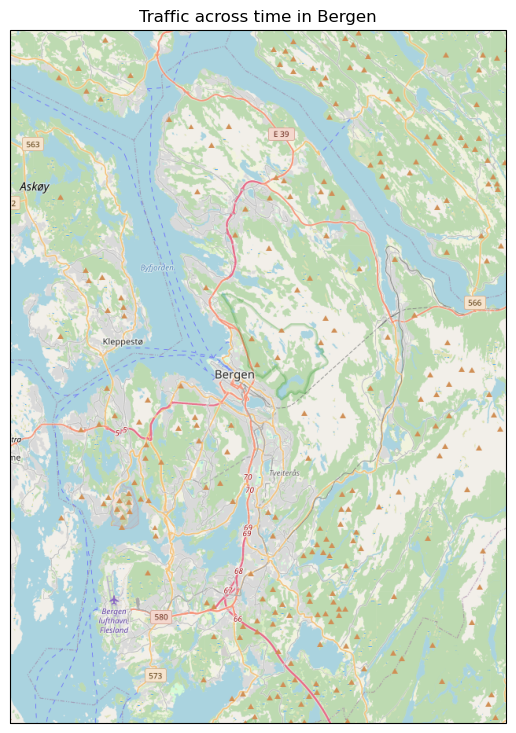

In [22]:
fig = plt.figure(figsize=(12,9)) # open matplotlib figure
ax = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map

center_pt = [60.39299, 5.32415] # lat/lon of One World Trade Center in NYC
zoom = 0.15 # for zooming out of center point
extent = [center_pt[1]-(zoom*1.3),center_pt[1]+(zoom*1.6),center_pt[0]-zoom,center_pt[0]+zoom] # adjust to zoom
ax.set_extent(extent) # set extents

scale = np.ceil(-np.sqrt(2)*np.log(np.divide(zoom,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax.add_image(osm_img, int(scale))

ax.set_title('Traffic across time in Bergen')
# ax.set_xlabel('longitude')
# ax.set_ylabel('latitude')
# t = ax.text(5.4,60.25,'', fontdict={'family': 'serif',
#                 'color':  'white',
#                 'weight': 'normal',
#                 'size': 13,
#                 })

In [27]:
def animate(i):
    df = df_dict2[list(df_dict2.keys())[i]] 
    ts = time()
    
    ax.plot('lat', 'lon', data=df.where(df.color=="green"), c="green", transform=ccrs.Geodetic())
    ax.plot('lat', 'lon', data=df.where(df.color=="orange"), c="orange", transform=ccrs.Geodetic())
    ax.plot('lat', 'lon', data=df.where(df.color=="red"), c="red", transform=ccrs.Geodetic())
    
    ax.set_title(f'Traffic across time in Bergen: {str(pd.Timestamp.tz_convert(list(df_dict2.keys())[i], pytz.timezone("Europe/Oslo")))[:16]}')
    print(f"Time for plotting {i}: {time()-ts}")

In [28]:
ani = FuncAnimation(fig=fig, 
                    func=animate, 
                    frames=len(df_dict2.keys()), 
                    interval=1000, 
                    repeat_delay=False,
                    cache_frame_data=False)

ani.save(rf'C:\Users\Marco\Documents\GitHub\GeoSpatial-analysis\facility-location-Bergen\data\08_reporting\AnimatedPlot{day.replace("_", "")}morning.gif', 
         dpi=200)

MovieWriter ffmpeg unavailable; using Pillow instead.


Time for plotting 0: 6.893010377883911
Time for plotting 0: 6.242001295089722
Time for plotting 1: 6.209996461868286
Time for plotting 2: 6.186014175415039
Time for plotting 3: 6.077304363250732
Time for plotting 4: 5.889997720718384
Time for plotting 5: 6.896003246307373
Time for plotting 6: 7.272008895874023
Time for plotting 7: 6.190997838973999
Time for plotting 8: 5.934565305709839
Time for plotting 9: 7.122002601623535
Time for plotting 10: 6.304999828338623
Time for plotting 11: 7.346999406814575
Time for plotting 12: 6.819005727767944
Time for plotting 13: 7.698011159896851
Time for plotting 14: 6.560003280639648
Time for plotting 15: 6.515000581741333
Time for plotting 16: 6.734995365142822
Time for plotting 17: 6.862003564834595
Time for plotting 18: 6.564005374908447
Time for plotting 19: 6.410998821258545
Time for plotting 20: 6.575010776519775
Time for plotting 21: 7.129001617431641
Time for plotting 22: 6.947006940841675
Time for plotting 23: 5.835000038146973
Time for pl